<a href="https://colab.research.google.com/github/HeikoViel/advancedhpc2023/blob/main/labwork3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numba
from numba import cuda
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
image = plt.imread("frog.jpg")
x_pixel = image.shape[0]
y_pixel = image.shape[1]
image = image.reshape(x_pixel * y_pixel, 3)

<ipython-input-13-48f0178e30f0>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  new_image[i, 0] = new_image[i, 1] = new_image[i, 2] = np.uint8((image[i][0] + image[i][1] + image[i][2]) / 3)


2.3156306743621826


(-0.5, 745.5, 738.5, -0.5)

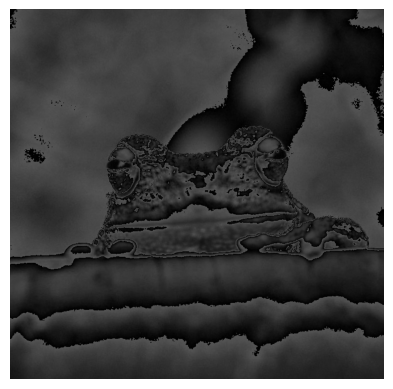

In [13]:
new_image = np.zeros([x_pixel*y_pixel, 3], dtype=np.uint8)

start = time.time()

for i in range(x_pixel * y_pixel):
  new_image[i, 0] = new_image[i, 1] = new_image[i, 2] = np.uint8((image[i][0] + image[i][1] + image[i][2]) / 3)

print(time.time() - start)

new_image = new_image.reshape(x_pixel, y_pixel, 3)
fig, ax = plt.subplots()
ax.imshow(new_image)
ax.axis('off')

In [3]:
@cuda.jit
def grayscale(src, dst):
  tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
  g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
  dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g

0.0006668567657470703


(-0.5, 745.5, 738.5, -0.5)

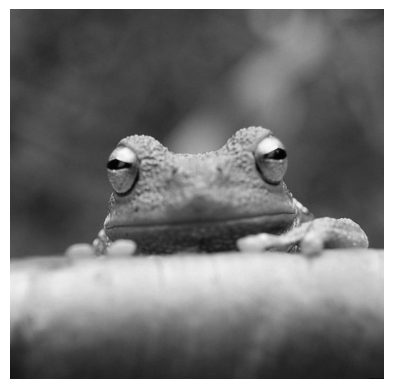

In [15]:
devSrc = cuda.to_device(image)
devDst = cuda.device_array((x_pixel * y_pixel, 3), np.uint8)
pixelCount = x_pixel * y_pixel
blockSize = 32
gridSize = np.uint16(pixelCount / blockSize)
start = time.time()
grayscale[gridSize, blockSize](devSrc, devDst)
print(time.time() - start)
hostDst = devDst.copy_to_host()

hostDst = hostDst.reshape(x_pixel, y_pixel, 3)
fig, ax = plt.subplots()
ax.imshow(hostDst)
ax.axis('off')